<h3 style="color: aqua;">Data Analytics Assignment II</h3>
<h3 style="color: aqua;">GROUP MEMBERS</h3>
<div style="font-size: 15px; line-height: 1;">
<p><li>Purity Irungu:  <span style="padding-left: 50px;">PA106/G/11841/20</span></li></p>
<p><li>Sammy Ndungu:  <span style="padding-left: 30px;">PA106/G/10537/20</span></li></p
<p><li>Anifar Mariba:  <span style="padding-left: 48px;">PA106/G/10288/20</span</li></p
<p><li>Dancan Mutembei:  <span style="padding-left: 15px;">PA106/G/9644/20</span</li></>
<p><li>Erick Gitonga:  <span style="padding-left: 48px;">PA106/G/8566/20</span</li></p>
</div></center>

<div style="font-size: 15px; line-height: 1;">
  <p><li>import pandas library</p></li>
  <p><li>Loaded the datasets/excel sheets one by one, checking for NaN values. Where we found NaN values we filled them with the mean <span style="color: aqua;">[if it is a Super Petrol column that has NaN values, we have filled them using the mean of that Super Petrol column and same to the others. When filling NaN values we came across and error  <span style="color: orange;">"can only concatenate str (not "int") to str" </span> and so we had to convert columns with numerical values (['Super Petro', 'Diesel', 'Kerosene'] for this case) to a numeric data type using pd.to_numeric function. The errors='coerce' parameter replaces the non-numeric values with NaN. If the column with NaN values has string values like ['Town'] -> fill the NaN values with string 'Unknown' or with the most common town.]</span></li></p>
  <p>isnull().sum() -> It Returns the count of missing values in each column of the DataFrame.</p>
  <p>fillna() -> Used in filling NaN values.</p>
  <p>header=1 -> Will read the excel file and use the second row as the header of the DataFrame.</p>
  <p>header=2 -> Will read the excel file and use the third row as the header of the DataFrame.</p>
  <p>header=3 -> Will read the excel file and use the fourth row as the header of the DataFrame.</p>
  <p>header is useful when the first rows might contain non-descriptive information or when the actual column names are in either second, third, fourth etc row.</p>
  <p><li>Renaming of column names so that no confusion is created when merging the excel sheets. (['TOWN', 'TOWNS', 'Towns'] to ['Town']), (['Period', 'Price Period'] to ['Price Period']), (['Super', 'Super Petrol', 'KES/L'] to ['Super Petrol']), (['Automotive Diesel (AGO)', 'KES/L.1'] to ['Diesel']), (['Kerosene (DPK)', ' KShs/L .2', 'KES/L.2'] to ['Kerosene']).</li></p>
  <p><li>Sliced every DataFrame using .loc[:, 'Town':'Kerosene'] because we wanted to select a specific subset of columns within a DataFrame and because those columns were common to all DataFrame or excel files hence making merging easier.</li></p>
  <p><li>Merged all the loaded data.</li></p>
</div>


In [5]:
import urllib.request
import os

import matplotlib.pyplot as plt
import pandas as pd

## Bonus Question
 ### Write a Python script to download all the Excel Sheets, load all the Excel Sheets and analyze the average price of super petrol across the different towns

In [7]:
script_directory = os.getcwd()  # Use the current working directory

def download(url):
    
    
    # Specify the directory to save the downloaded files (same directory as the script)
    path = script_directory
    
    # Extract the file name from the URL
    file_name = os.path.basename(url).replace("-", "_")
    
    # Create the full file path
    file_location = os.path.join(path, file_name)
    
    try:
        
        # Download the file using urllib
        urllib.request.urlretrieve(url, file_location)
        print(f"Downloaded Sheet:  {file_name}")
     
    # Handle download failures   
    except Exception as e:
        print(f"Download failed: {url} ::: {e}")
        
 # List of file sheet URLs  to download     
file_links = [
                  "https://www.epra.go.ke/wp-content/uploads/2020/10/15th-January-14th-February-2022.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/10/15th-February-14th-March-2022_Website.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/10/15th-March-2022-to-April-2022.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-April-2022-14th-May-2022.csv",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Pump-Prices11-15-May-14-June-2022_Website.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Pump-Prices-15-June-14-July-2022_Website.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Prices-july-to-August-2022.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Prices-August-to-September-2022.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Prices-september-to-october-2022.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Prices-Oct-to-Nov-2022.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Prices-15th-Nov-14th-Dec-2022.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-December-2022-14th-January-2023.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-January-2023-%E2%80%9314th-February-2023-11.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-January-2023-%E2%80%9314th-February-2023-11.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-January-2023-%E2%80%9314th-February-2023-11.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/FINAL-ACTUAL-PUMP-PRICES_15th-MARCH-14th-APRIL-2023.xlsx",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-April-2023-to-14th-may-2023.csv",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-April-2023-to-14th-may-2023.csv",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/15th-June-2023-14th-July-2023.csv",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/July-1-July-14-2023.csv",
                #   "https://www.epra.go.ke/wp-content/uploads/2020/07/Pump-Prices-15-July-14-August-2023-Website.xlsx"
                ]       
# Iterate through each URL and download the Excel sheet
for link in file_links:
    download(link)
    

Download failed: https://www.epra.go.ke/wp-content/uploads/2020/10/15th-January-14th-February-2022.xlsx ::: <urlopen error [Errno 2] No such file or directory>


In [17]:
Jan_Feb22 = pd.read_excel("15th_January_14th_February_2022.xlsx");

Jan_Feb22.rename(columns={'Super': 'Super Petrol'}, inplace=True)
print(Jan_Feb22.head())

missed_Jan_Feb22 = Jan_Feb22.isnull() #False for all values[means that there are no missing values (NaN or null values) in the DataFrame Jan_Feb22.]
countnull_Jan_Feb22 = missed_Jan_Feb22.sum() #It Returns the count of missing values in each column of the DataFrame.

print(countnull_Jan_Feb22)

                              Price Period             Town  Super Petrol  \
0   15th January 2022 - 14th February 2022          Mombasa        127.46   
1   15th January 2022 - 14th February 2022           Kilifi        128.17   
2   15th January 2022 - 14th February 2022  Likoni Mainland        127.82   
3   15th January 2022 - 14th February 2022            Kwale        127.82   
4   15th January 2022 - 14th February 2022          Malindi        128.39   

   Diesel  Kerosene  
0  108.36    101.29  
1  109.07    102.01  
2  108.71    101.65  
3  108.71    101.65  
4  109.27    102.21  
Price Period    0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64


In [18]:
Feb_Mar22 = pd.read_excel("15th_February_14th_March_2022_Website.xlsx")
Feb_Mar22.rename(columns={'Super': 'Super Petrol'}, inplace=True)
print(Feb_Mar22.head())

Feb_Mar22.isnull().sum() #It Returns the count of missing values in each column of the DataFrame.

                           Price Period             Town  Super Petrol  \
0  February 15th 2022 - March 14th 2022          Mombasa        127.46   
1  February 15th 2022 - March 14th 2022           Kilifi        128.17   
2  February 15th 2022 - March 14th 2022  Likoni Mainland        127.82   
3  February 15th 2022 - March 14th 2022            Kwale        127.82   
4  February 15th 2022 - March 14th 2022          Malindi        128.39   

   Diesel  Kerosene  
0  108.36    101.29  
1  109.07    102.01  
2  108.71    101.65  
3  108.71    101.65  
4  109.27    102.21  


Price Period    0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [19]:
Mar_Apr22 = pd.read_excel("15th_March_2022_to_April_2022.xlsx")
Mar_Apr22.rename(columns={'Period': 'Price Period', 'Super': 'Super Petrol'}, inplace=True)
print(Mar_Apr22.head())
Mar_Apr22.isnull().sum() # No NaN values in the DataFrame

                    Price Period             Town  Super Petrol  Diesel  \
0  15th March 2022 to April 2022          Mombasa        132.46  113.36   
1  15th March 2022 to April 2022           Kilifi        133.17  114.07   
2  15th March 2022 to April 2022  Likoni Mainland        132.82  113.71   
3  15th March 2022 to April 2022            Kwale        132.82  113.71   
4  15th March 2022 to April 2022          Malindi        133.38  114.27   

   Kerosene  
0    101.29  
1    102.01  
2    101.65  
3    101.65  
4    102.21  


Price Period    0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [20]:
Apr_May22 = pd.read_csv("15th_April_2022_14th_May_2022.csv")
Apr_May22.rename(columns={'Super': 'Super Petrol'}, inplace=True)
print(Apr_May22.head())
Apr_May22.isnull().sum() # No NaN values in the DataFrame

                       Price Period             Town  Super Petrol  Diesel  \
0  15th April 2022 to 14th May 2022          Mombasa        142.36  123.26   
1  15th April 2022 to 14th May 2022           Kilifi        143.07  123.97   
2  15th April 2022 to 14th May 2022  Likoni Mainland        142.72  123.61   
3  15th April 2022 to 14th May 2022            Kwale        142.72  123.61   
4  15th April 2022 to 14th May 2022          Malindi        143.28  124.17   

   Kerosene  
0    111.19  
1    111.91  
2    111.55  
3    111.55  
4    112.11  


Price Period    0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [21]:
May_Jun22 = pd.read_excel("Pump_Prices11_15_May_14_June_2022_Website.xlsx")
print(May_Jun22.head())

May_Jun22.isnull().sum() #It Returns the count of missing values in each column of the DataFrame.


                       Unnamed: 0       Unnamed: 1    Unnamed: 2 Unnamed: 3  \
0                    Price Period             TOWN  Super Petrol     Diesel   
1  May 15th 2022 - June 14th 2022          Mombasa        147.86     128.76   
2  May 15th 2022 - June 14th 2022           Kilifi        148.57     129.47   
3  May 15th 2022 - June 14th 2022  Likoni Mainland        148.22     129.11   
4  May 15th 2022 - June 14th 2022            Kwale        148.22     129.11   

  Unnamed: 4  
0   Kerosene  
1     116.69  
2     117.41  
3     117.05  
4     117.05  


Unnamed: 0    0
Unnamed: 1    0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

## Columns names  not providing a clearer structure to the data.
### We should set header=1 to indicate that the second row is the one that contains the column names.

In [22]:
May_Jun22_header = pd.read_excel("Pump_Prices11_15_May_14_June_2022_Website.xlsx", header=1)
May_Jun22_header.rename(columns={'TOWN': 'Town'}, inplace=True)
print(May_Jun22_header.head()) #This will read the CSV file and use the second row as the header of the DataFrame. 

May_Jun22_header.isnull().sum() #It Returns the count of missing values in each column of the DataFrame.

                     Price Period             Town  Super Petrol  Diesel  \
0  May 15th 2022 - June 14th 2022          Mombasa        147.86  128.76   
1  May 15th 2022 - June 14th 2022           Kilifi        148.57  129.47   
2  May 15th 2022 - June 14th 2022  Likoni Mainland        148.22  129.11   
3  May 15th 2022 - June 14th 2022            Kwale        148.22  129.11   
4  May 15th 2022 - June 14th 2022          Malindi        148.78  129.67   

   Kerosene  
0    116.69  
1    117.41  
2    117.05  
3    117.05  
4    117.61  


Price Period    0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [23]:
Jun_Jul22 = pd.read_excel("Pump_Prices_15_June_14_July_2022_Website.xlsx")
print(Jun_Jul22.head())

Jun_Jul22.isnull().sum() #It Returns the count of missing values in each column of the DataFrame.

                        Unnamed: 0       Unnamed: 1    Unnamed: 2 Unnamed: 3  \
0                     Price Period             TOWN  Super Petrol     Diesel   
1  June 15th 2022 - July 14th 2022          Mombasa        156.86     137.76   
2  June 15th 2022 - July 14th 2022           Kilifi        157.57     138.47   
3  June 15th 2022 - July 14th 2022  Likoni Mainland        157.22     138.11   
4  June 15th 2022 - July 14th 2022            Kwale        157.22     138.11   

  Unnamed: 4  
0   Kerosene  
1     125.69  
2     126.41  
3     126.05  
4     126.05  


Unnamed: 0    0
Unnamed: 1    0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

## Columns names not providing a clearer structure to the data.
### We should set header=1 to indicate that the second row is the one that contains the column names.

In [24]:
Jun_Jul22_header = pd.read_excel("Pump_Prices_15_June_14_July_2022_Website.xlsx", header=1)
Jun_Jul22_header.rename(columns={'TOWN': 'Town'}, inplace=True)
print(Jun_Jul22_header.head(4)) #This will read the CSV file and use the second row as the header of the DataFrame.

Jun_Jul22_header.isnull().sum() #It Returns the count of missing values in each column of the DataFrame.

                      Price Period             Town  Super Petrol  Diesel  \
0  June 15th 2022 - July 14th 2022          Mombasa        156.86  137.76   
1  June 15th 2022 - July 14th 2022           Kilifi        157.57  138.47   
2  June 15th 2022 - July 14th 2022  Likoni Mainland        157.22  138.11   
3  June 15th 2022 - July 14th 2022            Kwale        157.22  138.11   

   Kerosene  
0    125.69  
1    126.41  
2    126.05  
3    126.05  


Price Period    0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [25]:
Jul_Aug22 = pd.read_excel("Prices_july_to_August_2022.xlsx")
print(Jul_Aug22.head())

Jul_Aug22.isnull().sum()

   Unnamed: 0 15th July 2022 –14th August 2022 MAXIMUM PUMP PRICES  \
0         NaN                              NaN  Super Petrol (PMS)   
1         NaN                            TOWNS               KES/L   
2         1.0                          Mombasa              156.86   
3         2.0                           Kilifi              157.57   
4         3.0                  Likoni Mainland              157.22   

                Unnamed: 3      Unnamed: 4  
0  Automotive Diesel (AGO)  Kerosene (DPK)  
1                    KES/L           KES/L  
2                   137.76          125.69  
3                   138.47          126.41  
4                   138.11          126.05  


Unnamed: 0                          2
15th July 2022 –14th August 2022    1
MAXIMUM PUMP PRICES                 0
Unnamed: 3                          0
Unnamed: 4                          0
dtype: int64

## Columns names  not providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [26]:
# Jul_Aug22_header = pd.read_excel("Prices-july-to-August-2022.xlsx", header=1)
Jul_Aug22_header = pd.read_excel("Prices_july_to_August_2022.xlsx", header=2)

# Rename columns in the DataFrame
Jul_Aug22_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)
print(Jul_Aug22_header.head())

Jul_Aug22_header.isnull().sum()


   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0           1          Mombasa        156.86  137.76    125.69
1           2           Kilifi        157.57  138.47    126.41
2           3  Likoni Mainland        157.22  138.11    126.05
3           4            Kwale        157.22  138.11    126.05
4           5          Malindi        157.78  138.67    126.61


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [27]:
Aug_Sep22 = pd.read_excel("Prices_August_to_September_2022.xlsx")
print(Aug_Sep22.head())

   Unnamed: 0 15th August 2022 –14th September 2022 MAXIMUM PUMP PRICES  \
0         NaN                                   NaN  Super Petrol (PMS)   
1         NaN                                 TOWNS               KES/L   
2         1.0                               Mombasa              156.86   
3         2.0                                Kilifi              157.57   
4         3.0                       Likoni Mainland              157.22   

                Unnamed: 3      Unnamed: 4  
0  Automotive Diesel (AGO)  Kerosene (DPK)  
1                    KES/L           KES/L  
2                   137.76          125.69  
3                   138.47          126.41  
4                   138.11          126.05  


## Columns names  not providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [28]:
Aug_Sep22_header = pd.read_excel("Prices_August_to_September_2022.xlsx", header=2)

Aug_Sep22_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)

print(Aug_Sep22_header.head())

Aug_Sep22_header.isnull().sum()

   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0           1          Mombasa        156.86  137.76    125.69
1           2           Kilifi        157.57  138.47    126.41
2           3  Likoni Mainland        157.22  138.11    126.05
3           4            Kwale        157.22  138.11    126.05
4           5          Malindi        157.78  138.67    126.61


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [29]:
Sep_Oct22 = pd.read_excel("Prices_september_to_october_2022.xlsx")
Sep_Oct22.head()

,Unnamed: 0,15th September 2022 –14th October 2022,MAXIMUM PUMP PRICES,Unnamed: 3,Unnamed: 4
0,NaN,NaN,Super Petrol (PMS),Automotive Diesel (AGO),Kerosene (DPK)
1,NaN,TOWNS,KES/L,KES/L,KES/L
2,1.0,Mombasa,176.98,162.76,145.69
3,2.0,Kilifi,177.69,163.47,146.41
4,3.0,Likoni Mainland,177.34,163.11,146.05


## Columns names  not providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [30]:
Sep_Oct22_header = pd.read_excel("Prices_september_to_october_2022.xlsx", header=2)

Sep_Oct22_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)

print(Sep_Oct22_header.head())

Sep_Oct22_header.isnull().sum()

   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0           1          Mombasa        176.98  162.76    145.69
1           2           Kilifi        177.69  163.47    146.41
2           3  Likoni Mainland        177.34  163.11    146.05
3           4            Kwale        177.34  163.11    146.05
4           5          Malindi        177.90  163.67    146.61


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [31]:
Oct_Nov22 = pd.read_excel("Prices_Oct_to_Nov_2022.xlsx")
print(Oct_Nov22.head())

   Unnamed: 0 15th October 2022 –14th November 2022 MAXIMUM PUMP PRICES  \
0         NaN                                   NaN  Super Petrol (PMS)   
1         NaN                                 TOWNS               KES/L   
2         1.0                               Mombasa              175.98   
3         2.0                                Kilifi              176.69   
4         3.0                       Likoni Mainland              176.34   

                Unnamed: 3      Unnamed: 4  
0  Automotive Diesel (AGO)  Kerosene (DPK)  
1                    KES/L           KES/L  
2                   160.76          144.69  
3                   161.47          145.41  
4                   161.11          145.05  


## Columns names  not providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [32]:
Oct_Nov22_header = pd.read_excel("Prices_Oct_to_Nov_2022.xlsx", header=2)

Oct_Nov22_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)

print(Oct_Nov22_header.head())

Oct_Nov22_header.isnull().sum()

   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0           1          Mombasa        175.98  160.76    144.69
1           2           Kilifi        176.69  161.47    145.41
2           3  Likoni Mainland        176.34  161.11    145.05
3           4            Kwale        176.34  161.11    145.05
4           5          Malindi        176.90  161.67    145.61


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [33]:
Nov_Dec22 = pd.read_excel("Prices_15th_Nov_14th_Dec_2022.xlsx")
Nov_Dec22.head()

,Unnamed: 0,15th November 2022 – 14th December 2022,MAXIMUM PUMP PRICES,Unnamed: 3,Unnamed: 4
0,NaN,NaN,Super Petrol (PMS),Automotive Diesel (AGO),Kerosene (DPK)
1,NaN,TOWNS,KES/L,KES/L,KES/L
2,1.0,Mombasa,174.98,159.76,143.69
3,2.0,Kilifi,175.69,160.47,144.41
4,3.0,Likoni Mainland,175.34,160.11,144.05


## Columns names  not providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [34]:
Nov_Dec22_header = pd.read_excel("Prices_15th_Nov_14th_Dec_2022.xlsx", header=2)

Nov_Dec22_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)

print(Nov_Dec22_header.head())

Nov_Dec22_header.isnull().sum()

   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0           1          Mombasa        174.98  159.76    143.69
1           2           Kilifi        175.69  160.47    144.41
2           3  Likoni Mainland        175.34  160.11    144.05
3           4            Kwale        175.34  160.11    144.05
4           5          Malindi        175.90  160.67    144.61


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [35]:
Dec_Jan23 = pd.read_excel("15th_December_2022_14th_January_2023.xlsx")
print(Dec_Jan23.head())

   Unnamed: 0 15th December 2022 –14th January 2023 MAXIMUM PUMP PRICES  \
0         NaN                                   NaN  Super Petrol (PMS)   
1         NaN                                 TOWNS               KES/L   
2         1.0                               Mombasa              174.98   
3         2.0                                Kilifi              175.69   
4         3.0                       Likoni Mainland              175.34   

                Unnamed: 3      Unnamed: 4  
0  Automotive Diesel (AGO)  Kerosene (DPK)  
1                    KES/L           KES/L  
2                   159.76          143.69  
3                   160.47          144.41  
4                   160.11          144.05  


## Columns names  not providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [36]:
Dec_Jan23_header = pd.read_excel("15th_December_2022_14th_January_2023.xlsx", header=2)
Dec_Jan23_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)

print(Dec_Jan23_header.head())

Dec_Jan23_header.isnull().sum()

   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0           1          Mombasa        174.98  159.76    143.69
1           2           Kilifi        175.69  160.47    144.41
2           3  Likoni Mainland        175.34  160.11    144.05
3           4            Kwale        175.34  160.11    144.05
4           5          Malindi        175.90  160.67    144.61


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [38]:
Jan_Feb23 = pd.read_excel("15th_January_2023_%E2%80%9314th_February_2023_11.xlsx")
print(Jan_Feb23.head())

   Unnamed: 0 15th January 2023 –14th February 2023 MAXIMUM PUMP PRICES  \
0         NaN                                   NaN  Super Petrol (PMS)   
1         NaN                                 TOWNS               KES/L   
2         1.0                               Mombasa              174.98   
3         2.0                                Kilifi              175.69   
4         3.0                       Likoni Mainland              175.34   

                Unnamed: 3      Unnamed: 4  
0  Automotive Diesel (AGO)  Kerosene (DPK)  
1                    KES/L           KES/L  
2                   159.76          143.69  
3                   160.47          144.41  
4                   160.11          144.05  


## Columns names  not  providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [39]:
Jan_Feb23_header = pd.read_excel("15th_January_2023_%E2%80%9314th_February_2023_11.xlsx", header=2)
Jan_Feb23_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)

print(Jan_Feb23_header)
Jan_Feb23_header.isnull().sum()

     Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0             1          Mombasa        174.98  159.76    143.69
1             2           Kilifi        175.69  160.47    144.41
2             3  Likoni Mainland        175.34  160.11    144.05
3             4            Kwale        175.34  160.11    144.05
4             5          Malindi        175.90  160.67    144.61
..          ...              ...           ...     ...       ...
218         219           Keumbu        178.44  163.64    147.61
219         220           Marani        178.14  163.35    147.31
220         221           Kerina        178.50  163.71    147.68
221         222           Ikonge        177.86  163.07    147.03
222         223       Nyansiongo        178.26  163.47    147.43

[223 rows x 5 columns]


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [40]:
Mar_Apr23 = pd.read_excel("FINAL_ACTUAL_PUMP_PRICES_15th_MARCH_14th_APRIL_2023.xlsx")
print(Mar_Apr23.head())

   Unnamed: 0  Unnamed: 1                 Unnamed: 2     Unnamed: 3  \
0         NaN         NaN                        NaN            NaN   
1         NaN         NaN  15  March - 14 April 2023            NaN   
2         NaN         NaN                   Importer    Vessel Name   
3         1.0         NaN               TEXAS ENERGY  MT Sealegend    
4         2.0         NaN               ORYXENERGIES  MT  STI LOTUS   

                Unnamed: 4                 Unnamed: 5 Unnamed: 6 Unnamed: 7  \
0                      NaN                        NaN        NaN        NaN   
1                      NaN                        NaN        NaN        NaN   
2  Last dates of discharge  Deemed Exchange Rate Date     Bank 1     Bank 2   
3      2023-02-14 00:00:00        2023-02-14 00:00:00   134.4288     131.43   
4      2023-03-03 00:00:00        2023-03-03 00:00:00   137.0016     136.99   

  Unnamed: 8                         Unnamed: 9 Unnamed: 10 Unnamed: 11  \
0        NaN           

## Columns names not providing a clearer structure to the data.
### We should set header=3 to indicate that the second row is the one that contains the column names.

In [147]:
Mar_Apr23_header = pd.read_excel("FINAL_ACTUAL_PUMP_PRICES_15th_MARCH_14th_APRIL_2023.xlsx", header=3)
print(Mar_Apr23_header.head())
Mar_Apr23_header.isnull().sum()

   Unnamed: 0  Unnamed: 1      Importer        Vessel Name  \
0         1.0         NaN  TEXAS ENERGY      MT Sealegend    
1         2.0         NaN  ORYXENERGIES      MT  STI LOTUS   
2         3.0         NaN     E3 ENERGY       MT Serengeti   
3         4.0         NaN     E3 ENERGY       MT Serengeti   
4         5.0         NaN     E3 ENERGY  MT  Nakhal Silver   

  Last dates of discharge Deemed Exchange Rate Date    Bank 1  Bank 2  Bank 3  \
0              2023-02-14                2023-02-14  134.4288  131.43  133.50   
1              2023-03-03                2023-03-03  137.0016  136.99  137.75   
2              2023-02-26                2023-02-27  136.0368  133.95  136.90   
3              2023-02-26                2023-02-27  136.0368  133.95  136.90   
4              2023-02-18                2023-02-20  134.7504  132.05  134.90   

   Average Rate for Commercial Banks  CBK     Average          Product  \
0                         133.119600  NaN  133.119600     AGO K02/

In [41]:
Apr_May23 = pd.read_csv("15th_April_2023_to_14th_may_2023.csv")
print(Apr_May23.head())

   Unnamed: 0 15th  April 2023 to 14th  May 2023  MAXIMUM PUMP PRICES  \
0         NaN                                NaN  Super\nPetrol (PMS)   
1         NaN                              TOWNS               Ksh./L   
2         1.0                            Mombasa               176.98   
3         2.0                             Kilifi               177.69   
4         3.0                    Likoni Mainland               177.34   

                 Unnamed: 3      Unnamed: 4  Unnamed: 5  Unnamed: 6  \
0  Automotive\nDiesel (AGO)  Kerosene (DPK)         NaN         NaN   
1                    Ksh./L          Ksh./L         NaN        75.0   
2                    159.76          143.69         NaN        76.0   
3                    160.47          144.41         NaN        77.0   
4                    160.11          144.05         NaN        78.0   

  15th  April 2023 ?\n14th  May 2023 MAXIMUM PUMP PRICES.1  \
0                                NaN   Super\nPetrol (PMS)   
1         

## Columns names not  providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [42]:
Apr_May23_header = pd.read_csv("15th_April_2023_to_14th_may_2023.csv", header=2)
Apr_May23_header.rename(columns={'TOWNS': 'Town' ,'Ksh./L': 'Super Petrol', 'Ksh./L.1': 'Diesel', 'Ksh./L.2': 'Kerosene'}, inplace=True)
print(Apr_May23_header.head())

# Apr_May23_header.isnull().sum()

   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene  Unnamed: 5  \
0         1.0          Mombasa        176.98  159.76    143.69         NaN   
1         2.0           Kilifi        177.69  160.47    144.41         NaN   
2         3.0  Likoni Mainland        177.34  160.11    144.05         NaN   
3         4.0            Kwale        177.34  160.11    144.05         NaN   
4         5.0          Malindi        177.90  160.67    144.61         NaN   

     75       Gilgil  178.58  161.79  145.76  Unnamed: 11    150    Kabiyet  \
0  76.0      Mogotio  178.57  161.78  145.74          NaN  151.0   Cheptulu   
1  77.0         Molo  178.65  161.86  145.83          NaN  152.0     Songor   
2  78.0  Olenguruone  179.36  162.56  146.53          NaN  153.0  Kapcherop   
3  79.0     Londiani  178.88  162.09  146.05          NaN  154.0   Sambalat   
4  80.0    Nyahururu  178.87  162.08  146.04          NaN  155.0      Arror   

   179.51  162.72  146.67  
0  179.93  163.15  147.10  


In [43]:
#  pd.to_numeric function -> convert columns with numerical values to a numeric data type.
# The errors='coerce' parameter replaces the non-numeric values with NaN.

Apr_May23_header['Diesel'] = pd.to_numeric(Apr_May23_header['Diesel'], errors='coerce')
Apr_May23_header['Super Petrol'] = pd.to_numeric(Apr_May23_header['Super Petrol'], errors='coerce')
Apr_May23_header['Kerosene'] = pd.to_numeric(Apr_May23_header['Kerosene'], errors='coerce')

In [44]:
print("The Diesel Mean:", Apr_May23_header['Diesel'].mean())
print("The Kerosene Mean:", Apr_May23_header['Kerosene'].mean())
print("The Super Petrol Mean:", Apr_May23_header['Super Petrol'].mean())

The Diesel Mean: 164.94864864864866
The Kerosene Mean: 148.8847297297297
The Super Petrol Mean: 182.22094594594594


In [45]:
# Specify the columns you want to fill with the mean
Apr_May23_header['Super Petrol'] = Apr_May23_header['Super Petrol'].fillna(Apr_May23_header['Super Petrol'].mean())
Apr_May23_header['Diesel'] = Apr_May23_header['Diesel'].fillna(Apr_May23_header['Diesel'].mean())
Apr_May23_header['Kerosene'] = Apr_May23_header['Kerosene'].fillna(Apr_May23_header['Kerosene'].mean())

In [46]:
# filling the Town Column NaN values with string 'Unknown' since no most common town(all are unique)
Apr_May23_header['Town'].fillna('Unknown', inplace=True)

In [47]:
Apr_May23_header = Apr_May23_header.loc[:, 'Town':'Kerosene']

In [48]:
Apr_May23_header.isnull().sum()

Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [49]:
Jun_Jul23 = pd.read_csv("15th_June_2023_14th_July_2023.csv")
print(Jun_Jul23.head())

  15th June 2023- 14th July 2023                   Unnamed: 1  \
0                            NaN                          NaN   
1                            NaN                                
2                            NaN                        TOWNS   
3                              1                      Mombasa   
4                              2                       Kilifi   

            Unnamed: 2               Unnamed: 3     Unnamed: 4  
0  MAXIMUM PUMP PRICES                      NaN            NaN  
1   Super Petrol (PMS)  Automotive Diesel (AGO)  Kerosene (IK)  
2              KShs/L                   KShs/L         KShs/L   
3                179.2                   164.45         158.65  
4               179.92                   165.16         159.36  


## Columns names not  providing a clearer structure to the data.
### We should set header=3 to indicate that the second row is the one that contains the column names.

In [50]:
Jun_Jul23_header = pd.read_csv("15th_June_2023_14th_July_2023.csv", header=3)
Jun_Jul23_header.rename(columns={'                      TOWNS': 'Town', ' KShs/L ': 'Super Petrol', ' KShs/L .1': 'Diesel', ' KShs/L .2': 'Kerosene'}, inplace=True)

print(Jun_Jul23_header.head())
Jun_Jul23_header.isnull().sum()

  Unnamed: 0             Town Super Petrol  Diesel Kerosene
0          1          Mombasa        179.2  164.45   158.65
1          2           Kilifi       179.92  165.16   159.36
2          3  Likoni Mainland       179.56  164.81   159.01
3          4            Kwale       179.56  164.81   159.01
4          5          Malindi       180.12  165.37   159.57


Unnamed: 0      18
Town            12
Super Petrol     6
Diesel          12
Kerosene        12
dtype: int64

In [51]:
Jun_Jul23_header = Jun_Jul23_header.loc[:, 'Town':'Kerosene']
print(Jun_Jul23_header.head())

              Town Super Petrol  Diesel Kerosene
0          Mombasa        179.2  164.45   158.65
1           Kilifi       179.92  165.16   159.36
2  Likoni Mainland       179.56  164.81   159.01
3            Kwale       179.56  164.81   159.01
4          Malindi       180.12  165.37   159.57


In [52]:
#  pd.to_numeric function -> convert columns with numerical values to a numeric data type.
# The errors='coerce' parameter replaces the non-numeric values with NaN.


Jun_Jul23_header['Diesel'] = pd.to_numeric(Jun_Jul23_header['Diesel'], errors='coerce')
Jun_Jul23_header['Super Petrol'] = pd.to_numeric(Jun_Jul23_header['Super Petrol'], errors='coerce')
Jun_Jul23_header['Kerosene'] = pd.to_numeric(Jun_Jul23_header['Kerosene'], errors='coerce')


print("The Diesel Mean:", Jun_Jul23_header['Diesel'].mean())
print("The Kerosene Mean:", Jun_Jul23_header['Kerosene'].mean())
print("The Super Petrol Mean:", Jun_Jul23_header['Super Petrol'].mean())

# Specify the columns you want to fill with the mean
Jun_Jul23_header['Super Petrol'] = Jun_Jul23_header['Super Petrol'].fillna(Jun_Jul23_header['Super Petrol'].mean())
Jun_Jul23_header['Diesel'] = Jun_Jul23_header['Diesel'].fillna(Jun_Jul23_header['Diesel'].mean())
Jun_Jul23_header['Kerosene'] = Jun_Jul23_header['Kerosene'].fillna(Jun_Jul23_header['Kerosene'].mean())

The Diesel Mean: 169.11130044843043
The Kerosene Mean: 163.32372197309414
The Super Petrol Mean: 183.62560538116594


In [53]:
# filling the Town Column NaN values with string 'Unknown' since no most common town(all are unique)
Jun_Jul23_header['Town'].fillna('Unknown', inplace=True)

In [54]:
Jun_Jul23_header.isnull().sum()

Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [55]:
Jul1_Jul14 = pd.read_csv("July_1_July_14_2023.csv")
print(Jul1_Jul14.head())

   Unnamed: 0 July 1 -July 14, 2023 MAXIMUM PUMP PRICES  \
0         NaN                   NaN  Super Petrol (PMS)   
1         NaN                 TOWNS               KES/L   
2         1.0               Mombasa              192.48   
3         2.0                Kilifi              193.24   
4         3.0       Likoni Mainland              192.86   

                Unnamed: 3      Unnamed: 4  
0  Automotive Diesel (AGO)  Kerosene (DPK)  
1                    KES/L           KES/L  
2                   176.63           170.4  
3                    177.4          171.17  
4                   177.02          170.79  


## Columns names not  providing a clearer structure to the data.
### We should set header=2 to indicate that the second row is the one that contains the column names.

In [56]:
Jul1_Jul14_header = pd.read_csv("July_1_July_14_2023.csv", header=2)
Jul1_Jul14_header.rename(columns={'TOWNS': 'Town', 'KES/L': 'Super Petrol', 'KES/L.1': 'Diesel', 'KES/L.2': 'Kerosene'}, inplace=True)
print(Jul1_Jul14_header.head())

Jul1_Jul14_header.isnull().sum()

   Unnamed: 0             Town  Super Petrol  Diesel  Kerosene
0           1          Mombasa        192.48  176.63    170.40
1           2           Kilifi        193.24  177.40    171.17
2           3  Likoni Mainland        192.86  177.02    170.79
3           4            Kwale        192.86  177.02    170.79
4           5          Malindi        193.47  177.62    171.39


Unnamed: 0      0
Town            0
Super Petrol    0
Diesel          0
Kerosene        0
dtype: int64

In [57]:
Jul_Aug23 = pd.read_excel("Pump_Prices_15_July_14_August_2023_Website.xlsx")
print(Jul_Aug23.head())

   Unnamed: 0                         Unnamed: 1       Unnamed: 2  \
0         NaN                       Price Period             TOWN   
1         NaN  July 15th 2023 - August 14th 2023          Mombasa   
2         NaN  July 15th 2023 - August 14th 2023           Kilifi   
3         NaN  July 15th 2023 - August 14th 2023  Likoni Mainland   
4         NaN  July 15th 2023 - August 14th 2023            Kwale   

     Unnamed: 3  Unnamed: 4  Unnamed: 5  
0  Super Petrol      Diesel    Kerosene  
1    191.623637  176.628095  166.432575  
2    192.393558  177.398016  167.192497  
3    192.003637  177.018095  166.812575  
4    192.003637  177.018095  166.812575  


## Columns names  not providing a clearer structure to the data.
### We should set header=1 to indicate that the second row is the one that contains the column names.

In [58]:
Jul_Aug23_header = pd.read_excel("Pump_Prices_15_July_14_August_2023_Website.xlsx", header=1)
Jul_Aug23_header.rename(columns={'Unnamed: 0': 'Sheet', 'TOWN': 'Town',}, inplace=True)

print(Jul_Aug23_header.head(2))
Jul_Aug23_header.isnull().sum()

   Sheet                       Price Period     Town  Super Petrol  \
0    NaN  July 15th 2023 - August 14th 2023  Mombasa    191.623637   
1    NaN  July 15th 2023 - August 14th 2023   Kilifi    192.393558   

       Diesel    Kerosene  
0  176.628095  166.432575  
1  177.398016  167.192497  


Sheet           223
Price Period      0
Town              0
Super Petrol      0
Diesel            0
Kerosene          0
dtype: int64

### Handling the NaN values using fillna(DataFrame.mean())

In [59]:
filled_Jul_Aug23 = Jul_Aug23_header.fillna(Jul_Aug23_header['Kerosene'].mean())
print(filled_Jul_Aug23.head())

        Sheet                       Price Period             Town  \
0  171.476372  July 15th 2023 - August 14th 2023          Mombasa   
1  171.476372  July 15th 2023 - August 14th 2023           Kilifi   
2  171.476372  July 15th 2023 - August 14th 2023  Likoni Mainland   
3  171.476372  July 15th 2023 - August 14th 2023            Kwale   
4  171.476372  July 15th 2023 - August 14th 2023          Malindi   

   Super Petrol      Diesel    Kerosene  
0    191.623637  176.628095  166.432575  
1    192.393558  177.398016  167.192497  
2    192.003637  177.018095  166.812575  
3    192.003637  177.018095  166.812575  
4    192.615161  177.619619  167.414099  


# Merge all the loaded data to have the all the price data in one singular dataframe

In [60]:
# Slicing all the DataFrames for merging simplicity

Jan_Feb22 = Jan_Feb22.loc[:, 'Town':'Kerosene']
Feb_Mar22 = Feb_Mar22.loc[:, 'Town':'Kerosene']
Mar_Apr22 = Mar_Apr22.loc[:, 'Town':'Kerosene']
Apr_May22 = Apr_May22.loc[:, 'Town':'Kerosene']
May_Jun22_header = May_Jun22_header.loc[:, 'Town':'Kerosene']
Jun_Jul22_header =Jun_Jul22_header.loc[:, 'Town':'Kerosene']
Jul_Aug22_header =Jul_Aug22_header.loc[:, 'Town':'Kerosene']
Aug_Sep22_header =Aug_Sep22_header.loc[:, 'Town':'Kerosene']
Sep_Oct22_header =Sep_Oct22_header.loc[:, 'Town':'Kerosene']
Oct_Nov22_header =Oct_Nov22_header.loc[:, 'Town':'Kerosene']
Nov_Dec22_header =Nov_Dec22_header.loc[:, 'Town':'Kerosene']
Dec_Jan23_header =Dec_Jan23_header.loc[:, 'Town':'Kerosene']
Jan_Feb23_header =Jan_Feb23_header.loc[:, 'Town':'Kerosene']
Apr_May23_header =Apr_May23_header.loc[:, 'Town':'Kerosene']
Jul1_Jul14_header =Jul1_Jul14_header.loc[:, 'Town':'Kerosene']

Jul_Aug23_header = Jul_Aug23_header.loc[:, 'Town':'Kerosene']

In [61]:
# Adding Price Period column

Jan_Feb22['Price Period'] = 'January-2022'
Feb_Mar22['Price Period'] = 'February-2022'
Mar_Apr22['Price Period'] = 'March-2022'
Apr_May22['Price Period'] = 'April-2022'
May_Jun22_header['Price Period'] = 'May-2022'
Jun_Jul22_header['Price Period'] = 'June-2022'
Jul_Aug22_header['Price Period'] = 'July-2022'
Aug_Sep22_header['Price Period'] = 'August-2022'
Sep_Oct22_header['Price Period'] = 'September-2022'
Oct_Nov22_header['Price Period'] = 'October-2022'
Nov_Dec22_header['Price Period'] = 'November-2022'
Dec_Jan23_header['Price Period'] = 'December-2022'
Jan_Feb23_header['Price Period'] = 'January-2023'
Apr_May23_header['Price Period'] = 'April-2023'
Jun_Jul23_header['Price Period'] = 'June-2023'
Jul_Aug23_header['Price Period'] = 'July-2023'
Jul1_Jul14_header['Price Period'] = 'July1-July14 2023'

In [62]:
print(Jan_Feb22.columns)
print(Feb_Mar22.columns)
print(Mar_Apr22.columns)
print(Apr_May22.columns)
print(May_Jun22_header.columns)
print(Jun_Jul22_header.columns)
print(Jul_Aug22_header.columns)
print(Aug_Sep22_header.columns)
print(Sep_Oct22_header.columns)
print(Oct_Nov22_header.columns)
print(Nov_Dec22_header.columns)
print(Dec_Jan23_header.columns)
print(Jan_Feb23_header.columns)
# print(Mar_Apr23_header.columns)
print(Apr_May23_header.columns)
print(Jun_Jul23_header.columns)
print(Jul_Aug23_header.columns)
print(Jul1_Jul14_header.columns)

Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', 'Price Period'], dtype='object')
Index(['Town', 'Super Petrol', 'Diesel', 'Kerosene', '

In [63]:
merge = pd.concat([Jan_Feb22, Feb_Mar22, Mar_Apr22, Apr_May22, May_Jun22_header, Jun_Jul22_header, 
                   Jul_Aug22_header, Aug_Sep22_header, Sep_Oct22_header, Oct_Nov22_header,
                   Nov_Dec22_header, Dec_Jan23_header, Jan_Feb23_header, Apr_May23_header,
                   Jun_Jul23_header, Jul1_Jul14_header, Jul_Aug23_header])

print(merge)

                Town  Super Petrol      Diesel    Kerosene  Price Period
0            Mombasa    127.460000  108.360000  101.290000  January-2022
1             Kilifi    128.170000  109.070000  102.010000  January-2022
2    Likoni Mainland    127.820000  108.710000  101.650000  January-2022
3              Kwale    127.820000  108.710000  101.650000  January-2022
4            Malindi    128.390000  109.270000  102.210000  January-2022
..               ...           ...         ...         ...           ...
218           Keumbu    195.538156  180.902827  170.756763     July-2023
219           Marani    195.222728  180.587399  170.441334     July-2023
220           Kerina    195.608031  180.972703  170.826638     July-2023
221           Ikonge    194.909274  180.283946  170.137881     July-2023
222       Nyansiongo    195.340504  180.715175  170.569111     July-2023

[3507 rows x 5 columns]


In [64]:
merge_csv = merge.to_csv("merged_dataset.csv")
print(merge_csv)

None


## • Show the average price of super petrol, diesel and kerosene for each year?

## Merge all DataFrames for year 2022

In [65]:
merge_2022 = pd.concat([Jan_Feb22, Feb_Mar22, Mar_Apr22, Apr_May22, May_Jun22_header, Jun_Jul22_header, 
                   Jul_Aug22_header, Aug_Sep22_header, Sep_Oct22_header, Oct_Nov22_header,
                   Nov_Dec22_header])
average_prices_2022 = merge_2022[['Super Petrol', 'Diesel', 'Kerosene']].mean()
print(average_prices_2022)

Super Petrol    158.575906
Diesel          140.930759
Kerosene        128.261866
dtype: float64


## Merge all DataFrames for year 2023

In [313]:
merged_2023 = pd.concat([Dec_Jan23_header, Jan_Feb23_header, Apr_May23_header,
                   Jun_Jul23_header, Jul1_Jul14_header, Jul_Aug23_header])
average_prices_2023 = merged_2023[['Super Petrol', 'Diesel', 'Kerosene']].mean()
print(average_prices_2023)

Super Petrol    186.647412
Diesel          171.515687
Kerosene        160.336531
dtype: float64


## • Which town has the highest super petrol price in the country over the years?

In [314]:
# Reset the index of the DataFrame
merge.reset_index(drop=True, inplace=True)

In [315]:
town_mean_prices = merge.groupby('Town')['Super Petrol'].mean()

max_super_petrol_index = merge['Super Petrol'].idxmax()

town_with_highest_super_petrol = merge.loc[max_super_petrol_index, 'Town']

print("Town with the highest Super Petrol price is:", town_with_highest_super_petrol)
highest_price_value = town_mean_prices.max()


print(f"The Price is: {highest_price_value:.2f}")

Town with the highest Super Petrol price is: Mandera
The Price is: 183.63


### Draw a graph to represent the following:
#### Using a chosen graph of your choice, show the price of each month from January 2022 to date for the towns Mombasa and Nairobi.

<Figure size 864x432 with 0 Axes>

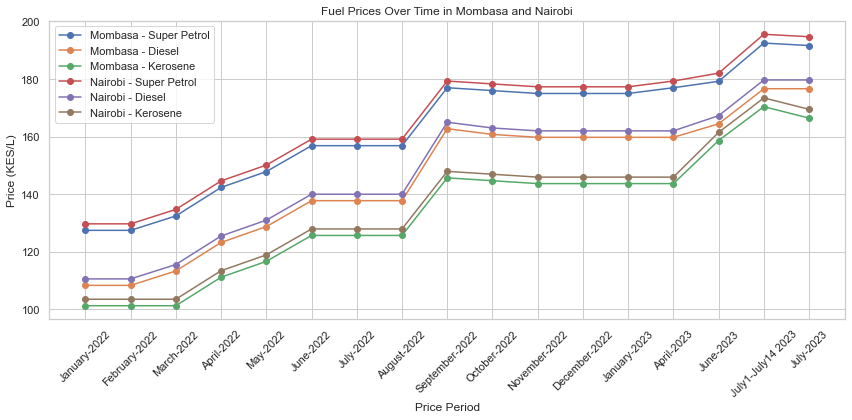

In [316]:
# Filter data for Mombasa and Nairobi and for the desired date range
filter_mombasa = merge[(merge['Town'] == 'Mombasa') & (merge['Price Period'])]
filter_nairobi = merge[(merge['Town'] == 'Nairobi') & (merge['Price Period'])]

# Combine Mombasa and Nairobi data
towns_merged = pd.concat([filter_mombasa, filter_nairobi])

# Create a line plot for each fuel type
plt.figure(figsize=(12, 6))

towns = ['Mombasa', 'Nairobi']
fuels = ['Super Petrol', 'Diesel', 'Kerosene']

plt.figure(figsize=(12, 6))

for town in towns:
    for fuel in fuels:
        label = f'{town} - {fuel}'
        plt.plot(towns_merged[towns_merged['Town'] == town]['Price Period'],
                 towns_merged[towns_merged['Town'] == town][fuel],
                 label=label, marker='o')

plt.title('Fuel Prices Over Time in Mombasa and Nairobi')
plt.xlabel('Price Period')
plt.ylabel('Price (KES/L)')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels


plt.show()

### Using a chosen graph of your choice, show the different prices over the years for the different fuels over the years

<Figure size 1440x720 with 0 Axes>

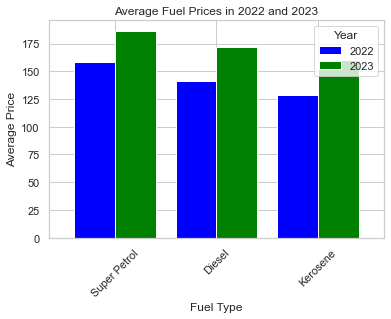

In [340]:
# Combine/Merge average prices for both years
average_prices_combined = pd.concat([average_prices_2022, average_prices_2023], axis=1)
average_prices_combined.columns = ['2022', '2023']

# Create a bar graph for average prices in both 2022 and 2023
plt.figure(figsize=(20, 10))
average_prices_combined.plot(kind='bar', color=['blue', 'green', 'red'], width=0.8)
plt.title('Average Fuel Prices in 2022 and 2023')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)  
plt.legend(title='Year')
plt.show()


## Bonus Question
### Analyze the average price of super petrol across the different towns


In [338]:
# Calculate the average price of Super Petrol across different towns
petrol_average_prices = merge.groupby('Town')['Super Petrol'].mean().reset_index()

# Display the computed average prices
print(petrol_average_prices)


                            Town  Super Petrol
0                                   183.625605
1                          TOWNS    183.625605
2                          Ahero    172.029437
3                          Alale    171.423131
4                   Archers Post    166.894573
..                           ...           ...
223                        Wamba    171.719954
224                       Webuye    164.915179
225                     Wundanji    167.791317
226                     Wundanyi    180.070000
227                         Ziwa    164.680457

[228 rows x 2 columns]
